In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import time
import pandas as pd

from netunicorn.base import Pipeline, Task, Success, Failure
from netunicorn.client.remote import RemoteClient, RemoteClientException
from netunicorn.base import Experiment, ExperimentStatus, Pipeline
from netunicorn.library.tasks.capture.tcpdump import StartCapture, StopNamedCapture
from netunicorn.library.tasks.upload.fileio import UploadToFileIO
from netunicorn.library.tasks.upload.webdav import UploadToWebDav
from netunicorn.library.tasks.basic import SleepTask
from netunicorn.library.tasks.measurements.ookla_speedtest import SpeedTest
from netunicorn.library.tasks.video_watchers.youtube_watcher import WatchYouTubeVideo
from netunicorn.library.tasks.video_watchers.vimeo_watcher import WatchVimeoVideo
from netunicorn.library.tasks.video_watchers.twitch_watcher import WatchTwitchStream

In [3]:
NETUNICORN_ENDPOINT = os.environ.get('NETUNICORN_ENDPOINT', 'https://pinot.cs.ucsb.edu/netunicorn')
NETUNICORN_LOGIN = os.environ.get('NETUNICORN_LOGIN', 'cs190n16')       # substitute your login here
NETUNICORN_PASSWORD = os.environ.get('NETUNICORN_PASSWORD', 'TEsjagDJ') # substitue your password here

In [4]:
client = RemoteClient(endpoint=NETUNICORN_ENDPOINT, login=NETUNICORN_LOGIN, password=NETUNICORN_PASSWORD)
print("Health Check: {}".format(client.healthcheck()))
nodes = client.get_nodes()
print(nodes)

Health Check: True
[[snl-server-5], <Uncountable node pool with next node template: [aws-fargate-A-cs190n16-, aws-fargate-B-cs190n16-, aws-fargate-ARM64-cs190n16-]>]


In [5]:
# for node in nodes:
#     print(node.name)
working_node = 'snl-server-5'

In [430]:
# clear file (not working?)
# run this in command prompt:
# rm /mnt/md0/cs190n/project/e7b2495e-476f-4253-87f2-5a2402323e59/tmp/youtube_capture1.pcap

# # or ...?

# file_path = "/tmp/youtube_capture1.pcap"

# # Open the file in write mode to truncate it
# with open(file_path, 'w') as file:
#     pass  # Opening in 'w' mode clears the file

In [431]:
# music
# https://www.youtube.com/watch?v=XxEhuSJF780
# https://www.youtube.com/watch?v=GSMzzou28Xo&t=37s
# https://www.youtube.com/watch?v=BSmYxnvUDHw&t=17214s
# https://www.youtube.com/watch?v=aUm_OogP1nM
# https://www.youtube.com/watch?v=OxMQjlBq6zQ
# https://www.youtube.com/watch?v=MYPVQccHhAQ
# https://www.youtube.com/watch?v=4wrmwRd4JWc
# https://www.youtube.com/watch?v=Wr1KbcjIW8Q
# https://www.youtube.com/watch?v=_4kHxtiuML0
# https://www.youtube.com/watch?v=7oqBh-WrqWU
# gaming
# https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s
# https://www.youtube.com/watch?v=x1SecGez6as
# https://www.youtube.com/watch?v=_cmV00x7GKY
# https://www.youtube.com/watch?v=5xdw6jpsnnQ
# https://www.youtube.com/watch?v=6D13iNaJFBs&t=591s
# https://www.youtube.com/watch?v=niQTsITVvhQ
# https://www.youtube.com/watch?v=zufMUTl-hu4
# https://www.youtube.com/watch?v=lsHs1KrbT9Q
# https://www.youtube.com/watch?v=4mI1NGCpR-4
# https://www.youtube.com/watch?v=c9akEr9y7XA

In [432]:
# pipeline = Pipeline()

# # MUSIC
# pipeline.then(StartCapture(filepath="/tmp/youtube_capture1.pcap", name="capture1"))
# for _ in range(10):
# #     WatchVimeoVideo
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=GSMzzou28Xo&t=37s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=BSmYxnvUDHw&t=17214s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=aUm_OogP1nM", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=OxMQjlBq6zQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=MYPVQccHhAQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=4wrmwRd4JWc", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=Wr1KbcjIW8Q", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=_4kHxtiuML0", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=7oqBh-WrqWU", 10))
# pipeline.then(StopNamedCapture(start_capture_task_name="capture1"))
# pipeline.then(SleepTask(2))

# # Upload Data
# pipeline.then(UploadToWebDav(
#     filepaths={"/tmp/youtube_capture1.pcap"},
#     endpoint="http://snl-server-5.cs.ucsb.edu/cs190n/project",  # Updated endpoint
#     username="uploader",
#     password="uploader"
# ))


In [433]:
# from selenium import webdriver 
# from selenium.webdriver.chrome.service import Service 
# from selenium.webdriver.chrome.options import Options
# # from pipeline import Pipeline, StartCapture, StopNamedCapture, WatchYouTubeVideo, SleepTask, UploadToWebDav
# # Setup Chrome options 
# chrome_options = Options()
# chrome_options.add_argument("--headless=new")
# # Run in headless mode 
# chrome_options.add_argument("--disable-gpu")  
# # Disable GPU acceleration
# chrome_options.add_argument("--no-sandbox")  
# # Needed for container environments 
# chrome_options.add_argument("--disable-dev-shm-usage")  
# # Overcome limited resources 
# chrome_options.add_argument("--disable-extensions")  
# # Disable unnecessary extensions

# pipeline = Pipeline()

# # MUSIC
# pipeline.then(StartCapture(filepath="/tmp/youtube_capture1.pcap", name="capture1"))
# for _ in range(1):
# #     WatchVimeoVideo
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=GSMzzou28Xo&t=37s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=BSmYxnvUDHw&t=17214s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=aUm_OogP1nM", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=OxMQjlBq6zQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=MYPVQccHhAQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=4wrmwRd4JWc", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=Wr1KbcjIW8Q", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=_4kHxtiuML0", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=7oqBh-WrqWU", 10))
# pipeline.then(StopNamedCapture(start_capture_task_name="capture1"))
# pipeline.then(SleepTask(2))

# # GAMING
# pipeline.then(StartCapture(filepath="/tmp/youtube_capture2.pcap", name="capture2"))
# for _ in range(1):
# #     WatchVimeoVideo
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=x1SecGez6as", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=_cmV00x7GKY", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=5xdw6jpsnnQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=6D13iNaJFBs&t=591s", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=niQTsITVvhQ", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=zufMUTl-hu4", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=lsHs1KrbT9Q", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=4mI1NGCpR-4", 10))
#     pipeline.then(WatchYouTubeVideo("https://www.youtube.com/watch?v=c9akEr9y7XA", 10))
# pipeline.then(StopNamedCapture(start_capture_task_name="capture2"))
# pipeline.then(SleepTask(2))

# # Upload Data
# pipeline.then(UploadToWebDav(
#     filepaths={"/tmp/youtube_capture1.pcap", "/tmp/youtube_capture2.pcap"},
#     endpoint="http://snl-server-5.cs.ucsb.edu/cs190n/project",  # Updated endpoint
#     username="uploader",
#     password="uploader"
# ))


In [434]:
# # vimeo test to solve 
# pipeline = Pipeline()

# # MUSIC
# pipeline.then(StartCapture(filepath="/tmp/youtube_capture1.pcap", name="capture1"))
# for _ in range(10):
# #     WatchVimeoVideo
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=GSMzzou28Xo&t=37s", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=BSmYxnvUDHw&t=17214s", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=aUm_OogP1nM", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=OxMQjlBq6zQ", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=MYPVQccHhAQ", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=4wrmwRd4JWc", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=Wr1KbcjIW8Q", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=_4kHxtiuML0", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=7oqBh-WrqWU", 10))
# pipeline.then(StopNamedCapture(start_capture_task_name="capture1"))
# pipeline.then(SleepTask(2))

# # GAMING
# pipeline.then(StartCapture(filepath="/tmp/youtube_capture2.pcap", name="capture2"))
# for _ in range(10):
# #     WatchVimeoVideo
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=yUo4ULfqcpU&t=16s", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=x1SecGez6as", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=_cmV00x7GKY", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=5xdw6jpsnnQ", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=6D13iNaJFBs&t=591s", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=niQTsITVvhQ", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=zufMUTl-hu4", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=lsHs1KrbT9Q", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=4mI1NGCpR-4", 10))
#     pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=c9akEr9y7XA", 10))
# pipeline.then(StopNamedCapture(start_capture_task_name="capture2"))
# pipeline.then(SleepTask(2))

# # Upload Data
# pipeline.then(UploadToWebDav(
#     filepaths={"/tmp/youtube_capture1.pcap", "/tmp/youtube_capture2.pcap"},
#     endpoint="http://snl-server-5.cs.ucsb.edu/cs190n/project",  # Updated endpoint
#     username="uploader",
#     password="uploader"
# ))


In [435]:
# seperating into 4 files to try to dodge resource issues
pipeline = Pipeline()

# MUSIC
pipeline.then(StartCapture(filepath="/tmp/youtube_capture8.pcap", name="capture8"))
for _ in range(10):
#     WatchVimeoVideo
    pipeline.then(WatchVimeoVideo("https://www.youtube.com/watch?v=c9akEr9y7XA", 10))
pipeline.then(StopNamedCapture(start_capture_task_name="capture8"))
pipeline.then(SleepTask(2))
# Upload Data
pipeline.then(UploadToWebDav(
    filepaths={"/tmp/youtube_capture8.pcap"},
    endpoint="http://snl-server-5.cs.ucsb.edu/cs190n/project",  # Updated endpoint
    username="uploader",
    password="uploader"
))


Pipeline(6a242193-5d6f-4393-bd27-300111bd7e91): {'root': [<netunicorn.library.tasks.capture.tcpdump.StartCapture object at 0x7f89ce855750>], 1: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce8562c0>], 2: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f8a9bc7ba30>], 3: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f8a9bc7ba90>], 4: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce6fdc60>], 5: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce6fda80>], 6: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce6fd750>], 7: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce6fc5b0>], 8: [<netunicorn.library.tasks.video_watchers.vimeo_watcher.WatchVimeoVideo object at 0x7f89ce6fdcf0>], 9: [<netunicorn.library.tasks.video

In [436]:
working_nodes = nodes.filter(lambda node: node.name.startswith(working_node)).take(1)

# Creating the experiment
experiment = Experiment().map(pipeline, working_nodes)
print(experiment)

 - Deployment: Node=snl-server-5, executor_id=, prepared=False, error=None


In [437]:
for line in experiment[0].environment_definition.commands:
    print(line)

sudo apt-get update
sudo apt-get install -y tcpdump
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 install selenium webdriver-manager
apt install -y python3-pip wget xvfb procps chromium chromium-driver
pip3 in

In [438]:
from netunicorn.base import DockerImage
for deployment in experiment:
    # you can explore the image on the DockerHub
    deployment.environment_definition = DockerImage(image='satyandraguthula/netunicorn_images:latest')
# change this name to ensure experiemnt runs properly below if needed
experiment_label = "data12"

In [439]:
try:
    client.delete_experiment(experiment_label)
except RemoteClientException:
    pass

client.prepare_experiment(experiment, experiment_label)

while True:
    info = client.get_experiment_status(experiment_label)
    print(info.status)
    if info.status == ExperimentStatus.READY:
        break
    time.sleep(20)

ExperimentStatus.PREPARING
ExperimentStatus.PREPARING
ExperimentStatus.READY


In [440]:
for deployment in client.get_experiment_status(experiment_label).experiment:
    print(f"Prepared: {deployment.prepared}, error: {deployment.error}")

Prepared: True, error: None


In [441]:
client.start_execution(experiment_label)

while True:
    info = client.get_experiment_status(experiment_label)
    print(info.status)
    if info.status != ExperimentStatus.RUNNING:
        break
    time.sleep(20)

ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.RUNNING
ExperimentStatus.FINISHED


In [442]:
from returns.pipeline import is_successful

for report in info.execution_result:
    print(f"Node name: {report.node.name}")
    print(f"Error: {report.error}")

    result, log = report.result  # report stores results of execution and corresponding log
    
    # result is a returns.result.Result object, could be Success of Failure
    print(f"Result is: {type(result)}")
    data = result.unwrap() if is_successful(result) else result.failure()
    for key, value in data.items():
        print(f"{key}: {value}")

    # we also can explore logs
    for line in log:
        print(line.strip())
    print()

Node name: snl-server-5
Error: None
Result is: <class 'returns.result.Success'>
capture8: [<Success: 8>]
58961ed1-2384-4d39-82ac-e5f0c5a35e2f: [<Success: Video finished by timeout: 10 seconds>]
e28e52d0-c5cf-47cd-8999-749bc8463fa0: [<Success: Video finished by timeout: 10 seconds>]
bd7a4d72-72c1-4b17-bdf7-40ea26988b77: [<Success: Video finished by timeout: 10 seconds>]
38e8e043-dd3e-4cd4-96e7-3cdc5a1cf240: [<Success: Video finished by timeout: 10 seconds>]
b5f87c3a-2f65-4e85-9b78-420e0b73fa71: [<Success: Video finished by timeout: 10 seconds>]
bedf248d-1423-464a-b470-50818544c323: [<Success: Video finished by timeout: 10 seconds>]
0500a568-b993-4e19-91b0-c9d6cca29307: [<Success: Video finished by timeout: 10 seconds>]
8df4daa8-59a2-40be-b1eb-2e6287bd57c9: [<Success: Video finished by timeout: 10 seconds>]
04414155-08fc-49e4-b694-1d649284964c: [<Success: Video finished by timeout: 10 seconds>]
61ec429b-3c54-4888-a66e-ccd598d8f6d6: [<Success: Video finished by timeout: 10 seconds>]
7ef55

In [443]:
# debug prints
# from returns.pipeline import is_successful

# for report in info.execution_result:
#     print(f"Node name: {report.node.name}")
#     result, log = report.result

#     if not is_successful(result):
#         print(f"Task failed in node: {report.node.name}")
#         print(f"Failure details: {result.failure()}")  # Show failure reason
#         print("Logs:")
#         for line in log:
#             print(line.strip())
#     else:
#         print("Task succeeded.")
#     print()


In [6]:
# /mnt/md0/cs190n/project/e7b2495e-476f-4253-87f2-5a2402323e59/tmp/youtube_capture1.pcap
# csv file location, cd to it then ls to check:
# /mnt/md0/cs190n/cs190n16
# youtube_capture1.pcap_Flow.csv

# actual things to do for this to work:
# run this to replace file path below:
# cd /mnt/md0/cs190n/project
# ls -lh
# to do more checking cd into the path/tmp
# check the corresponding time for the folder
# run the line below in command prompt to generate file (with 1st path replaced between project/ and /tmp):
# docker run -v /mnt/md0/cs190n/project/a67485c1-d22a-4abf-92c5-5fbbaf427f62/tmp/youtube_capture8.pcap:/tmp/youtube_capture8.pcap -v /mnt/md0/cs190n/cs190n16:/tmp/output --rm pinot.cs.ucsb.edu/cicflowmeter:latest /tmp/youtube_capture8.pcap /tmp/output

# 


In [ ]:
# files 1,2,3 are music, files 4,5,6 are gaming, need to combine them, file 7 is music test, and file 8 is gaming test

In [208]:
# # df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture1.pcap_Flow.csv")
# df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture1.pcap_Flow.csv", delimiter=',')
# df_vimeo.head()
# df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Music')
# # df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Gaming')
# # print(df_vimeo.columns)   # these are all columns that CICFlowMeter uses
# # features = [
# #     "size",
# #     "freq"
# # ]

In [390]:
# # music combining
# # Define the list of CSV files to combine
# csv_files = [
#     "/mnt/md0/cs190n/cs190n16/youtube_capture1.pcap_Flow.csv",
#     "/mnt/md0/cs190n/cs190n16/youtube_capture2.pcap_Flow.csv",
#     "/mnt/md0/cs190n/cs190n16/youtube_capture3.pcap_Flow.csv"
# ]

# # Read and concatenate all CSV files
# music_df = pd.concat([pd.read_csv(file, delimiter=',') for file in csv_files])

# # Replace 'NeedManualLabel' with 'Music' in the 'Label' column
# music_df['Label'] = music_df['Label'].replace('NeedManualLabel', 'Music')

# # Preview the combined DataFrame
# print(music_df.head())

# # Save the combined DataFrame to a new CSV file
# music_df.to_csv("/mnt/md0/cs190n/cs190n16/music_youtube_flows.csv", index=False)

# df_vimeo = music_df

                                  Flow ID           Src IP  Src Port  \
0  172.17.0.2-185.199.111.153-60776-443-6       172.17.0.2     60776   
1  185.199.111.153-172.17.0.2-443-60776-6  185.199.111.153       443   
2    172.17.0.2-143.244.50.82-48118-443-6       172.17.0.2     48118   
3   172.17.0.2-142.250.189.22-37526-443-6       172.17.0.2     37526   
4          172.17.0.2-8.8.4.4-50236-443-6       172.17.0.2     50236   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  185.199.111.153       443         6  12/12/2024 03:31:29 AM          48114   
1       172.17.0.2     60776         6  12/12/2024 03:31:29 AM             37   
2    143.244.50.82       443         6  12/12/2024 03:31:29 AM         116164   
3   142.250.189.22       443         6  12/12/2024 03:31:31 AM          39182   
4          8.8.4.4       443         6  12/12/2024 03:31:34 AM        9933519   

   Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
0 

In [479]:
# # gaming combining
# # Define the list of CSV files to combine
# csv_files = [
#     "/mnt/md0/cs190n/cs190n16/youtube_capture4.pcap_Flow.csv",
#     "/mnt/md0/cs190n/cs190n16/youtube_capture5.pcap_Flow.csv",
#     "/mnt/md0/cs190n/cs190n16/youtube_capture6.pcap_Flow.csv"
# ]

# # Read and concatenate all CSV files
# game_df = pd.concat([pd.read_csv(file, delimiter=',') for file in csv_files])

# # Replace 'NeedManualLabel' with 'Music' in the 'Label' column
# game_df['Label'] = game_df['Label'].replace('NeedManualLabel', 'Game')

# # Preview the combined DataFrame
# print(game_df.head())

# # Save the combined DataFrame to a new CSV file
# game_df.to_csv("/mnt/md0/cs190n/cs190n16/game_youtube_flows.csv", index=False)

# df_vimeo = game_df

                                  Flow ID           Src IP  Src Port  \
0  172.17.0.2-185.199.109.153-44042-443-6       172.17.0.2     44042   
1  185.199.109.153-172.17.0.2-443-44042-6  185.199.109.153       443   
2    172.17.0.2-143.244.50.82-36990-443-6       172.17.0.2     36990   
3   172.17.0.2-142.250.72.150-47674-443-6       172.17.0.2     47674   
4   142.250.72.150-172.17.0.2-443-47674-6   142.250.72.150       443   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  185.199.109.153       443         6  12/12/2024 08:59:57 PM          44158   
1       172.17.0.2     44042         6  12/12/2024 08:59:57 PM              4   
2    143.244.50.82       443         6  12/12/2024 08:59:57 PM         103909   
3   142.250.72.150       443         6  12/12/2024 08:59:59 PM          26268   
4       172.17.0.2     47674         6  12/12/2024 08:59:59 PM             12   

   Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
0 

In [462]:
# # music test
# df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture7.pcap_Flow.csv", delimiter=',')
# df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Music')
# df_vimeo.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-185.199.111.153-54754-443-6,172.17.0.2,54754,185.199.111.153,443,6,12/12/2024 11:02:30 PM,44993,195,218,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music
1,185.199.111.153-172.17.0.2-443-54754-6,185.199.111.153,443,172.17.0.2,54754,6,12/12/2024 11:02:30 PM,11,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music
2,172.17.0.2-143.244.49.180-59396-443-6,172.17.0.2,59396,143.244.49.180,443,6,12/12/2024 11:02:30 PM,111576,11,10,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music
3,172.17.0.2-142.250.68.54-41386-443-6,172.17.0.2,41386,142.250.68.54,443,6,12/12/2024 11:02:32 PM,26491,8,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music
4,142.250.68.54-172.17.0.2-443-41386-6,142.250.68.54,443,172.17.0.2,41386,6,12/12/2024 11:02:32 PM,26,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music


In [470]:
# # game test
# df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture8.pcap_Flow.csv", delimiter=',')
# df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Game')
# df_vimeo.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-185.199.111.153-54724-443-6,172.17.0.2,54724,185.199.111.153,443,6,12/12/2024 11:09:38 PM,43641,227,240,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Game
1,185.199.111.153-172.17.0.2-443-54724-6,185.199.111.153,443,172.17.0.2,54724,6,12/12/2024 11:09:38 PM,10,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Game
2,172.17.0.2-143.244.49.179-33692-443-6,172.17.0.2,33692,143.244.49.179,443,6,12/12/2024 11:09:38 PM,94262,10,10,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Game
3,172.17.0.2-142.250.176.22-55002-443-6,172.17.0.2,55002,142.250.176.22,443,6,12/12/2024 11:09:40 PM,35525,7,5,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Game
4,172.17.0.2-142.250.72.238-50608-443-6,172.17.0.2,50608,142.250.72.238,443,6,12/12/2024 11:09:42 PM,20979,9,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Game


In [480]:
# # packet avg number
# df_vimeo['Avg Packet Size'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / 2
# print(df_vimeo['Avg Packet Size'])

0       238.0
1         1.0
2        10.0
3         7.0
4         1.0
        ...  
2332      1.0
2333     12.5
2334      1.0
2335     75.0
2336      2.0
Name: Avg Packet Size, Length: 7139, dtype: float64


In [481]:
# # packet frequency
# df_vimeo['Packet Frequency'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / df_vimeo['Flow Duration']
# print(df_vimeo['Packet Frequency'])

0       0.010779
1       0.500000
2       0.000192
3       0.000533
4       0.166667
          ...   
2332    0.001514
2333    0.000007
2334    0.001727
2335    0.000014
2336    0.000944
Name: Packet Frequency, Length: 7139, dtype: float64


In [482]:
# # spikes
# df_vimeo['Fwd Spike'] = df_vimeo['Total Fwd Packet'].diff().fillna(0)
# df_vimeo['Bwd Spike'] = df_vimeo['Total Bwd packets'].diff().fillna(0)
# df_vimeo['Active Variability'] = df_vimeo['Active Std']
# print(df_vimeo['Active Variability'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2332    0.0
2333    0.0
2334    0.0
2335    0.0
2336    0.0
Name: Active Variability, Length: 7139, dtype: float64


In [474]:
# debug inspect spike
# print(df_vimeo[['Total Fwd Packet', 'Fwd Spike', 'Total Bwd packets', 'Bwd Spike']])

In [483]:
# # combine into dataframe
# features = df_vimeo[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
# labels = df_vimeo['Label'].apply(lambda x: 1 if x == 'Video' else 0)  # Binary classification

In [7]:
# # check dataframe before feeding to model
# print(features.head())
# print(df_vimeo['Label'].unique())  # Ensure it contains expected values, e.g., 'Video', 'Non-Video', etc.
# print(labels.head())  # Ensure transformation produces binary labels (1 for 'Video', 0 otherwise)
# print(df_vimeo['Label'].value_counts())

In [8]:
# music train combining
# Define the list of CSV files to combine
csv_files = [
    "/mnt/md0/cs190n/cs190n16/youtube_capture1.pcap_Flow.csv",
    "/mnt/md0/cs190n/cs190n16/youtube_capture2.pcap_Flow.csv",
    "/mnt/md0/cs190n/cs190n16/youtube_capture3.pcap_Flow.csv"
]

# Read and concatenate all CSV files
music_df = pd.concat([pd.read_csv(file, delimiter=',') for file in csv_files])

# Replace 'NeedManualLabel' with 'Music' in the 'Label' column
music_df['Label'] = music_df['Label'].replace('NeedManualLabel', 'Music')

# Preview the combined DataFrame
print(music_df.head())

# Save the combined DataFrame to a new CSV file
music_df.to_csv("/mnt/md0/cs190n/cs190n16/music_youtube_flows.csv", index=False)

df_vimeo = music_df

# packet avg number
df_vimeo['Avg Packet Size'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / 2
print(df_vimeo['Avg Packet Size'])

# packet frequency
df_vimeo['Packet Frequency'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / df_vimeo['Flow Duration']
print(df_vimeo['Packet Frequency'])

# spikes
df_vimeo['Fwd Spike'] = df_vimeo['Total Fwd Packet'].diff().fillna(0)
df_vimeo['Bwd Spike'] = df_vimeo['Total Bwd packets'].diff().fillna(0)
df_vimeo['Active Variability'] = df_vimeo['Active Std']
print(df_vimeo['Active Variability'])

# combine into dataframe
features = df_vimeo[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
labels = df_vimeo['Label'].apply(lambda x: 1 if x == 'Video' else 0)  # Binary classification

# check dataframe before feeding to model
print(features.head())
print(df_vimeo['Label'].unique())  # Ensure it contains expected values, e.g., 'Video', 'Non-Video', etc.
print(labels.head())  # Ensure transformation produces binary labels (1 for 'Video', 0 otherwise)
print(df_vimeo['Label'].value_counts())

# finalizing music train
mtrain = df_vimeo

                                  Flow ID           Src IP  Src Port  \
0  172.17.0.2-185.199.111.153-60776-443-6       172.17.0.2     60776   
1  185.199.111.153-172.17.0.2-443-60776-6  185.199.111.153       443   
2    172.17.0.2-143.244.50.82-48118-443-6       172.17.0.2     48118   
3   172.17.0.2-142.250.189.22-37526-443-6       172.17.0.2     37526   
4          172.17.0.2-8.8.4.4-50236-443-6       172.17.0.2     50236   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  185.199.111.153       443         6  12/12/2024 03:31:29 AM          48114   
1       172.17.0.2     60776         6  12/12/2024 03:31:29 AM             37   
2    143.244.50.82       443         6  12/12/2024 03:31:29 AM         116164   
3   142.250.189.22       443         6  12/12/2024 03:31:31 AM          39182   
4          8.8.4.4       443         6  12/12/2024 03:31:34 AM        9933519   

   Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
0 

In [9]:
# gaming train combining
# Define the list of CSV files to combine
csv_files = [
    "/mnt/md0/cs190n/cs190n16/youtube_capture4.pcap_Flow.csv",
    "/mnt/md0/cs190n/cs190n16/youtube_capture5.pcap_Flow.csv",
    "/mnt/md0/cs190n/cs190n16/youtube_capture6.pcap_Flow.csv"
]

# Read and concatenate all CSV files
game_df = pd.concat([pd.read_csv(file, delimiter=',') for file in csv_files])

# Replace 'NeedManualLabel' with 'Music' in the 'Label' column
game_df['Label'] = game_df['Label'].replace('NeedManualLabel', 'Game')

# Preview the combined DataFrame
print(game_df.head())

# Save the combined DataFrame to a new CSV file
game_df.to_csv("/mnt/md0/cs190n/cs190n16/game_youtube_flows.csv", index=False)

df_vimeo = game_df

# packet avg number
df_vimeo['Avg Packet Size'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / 2
print(df_vimeo['Avg Packet Size'])

# packet frequency
df_vimeo['Packet Frequency'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / df_vimeo['Flow Duration']
print(df_vimeo['Packet Frequency'])

# spikes
df_vimeo['Fwd Spike'] = df_vimeo['Total Fwd Packet'].diff().fillna(0)
df_vimeo['Bwd Spike'] = df_vimeo['Total Bwd packets'].diff().fillna(0)
df_vimeo['Active Variability'] = df_vimeo['Active Std']
print(df_vimeo['Active Variability'])

# combine into dataframe
features = df_vimeo[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
labels = df_vimeo['Label'].apply(lambda x: 1 if x == 'Video' else 0)  # Binary classification

# check dataframe before feeding to model
print(features.head())
print(df_vimeo['Label'].unique())  # Ensure it contains expected values, e.g., 'Video', 'Non-Video', etc.
print(labels.head())  # Ensure transformation produces binary labels (1 for 'Video', 0 otherwise)
print(df_vimeo['Label'].value_counts())

# finalizing game train
gtrain = df_vimeo

                                  Flow ID           Src IP  Src Port  \
0  172.17.0.2-185.199.109.153-44042-443-6       172.17.0.2     44042   
1  185.199.109.153-172.17.0.2-443-44042-6  185.199.109.153       443   
2    172.17.0.2-143.244.50.82-36990-443-6       172.17.0.2     36990   
3   172.17.0.2-142.250.72.150-47674-443-6       172.17.0.2     47674   
4   142.250.72.150-172.17.0.2-443-47674-6   142.250.72.150       443   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  185.199.109.153       443         6  12/12/2024 08:59:57 PM          44158   
1       172.17.0.2     44042         6  12/12/2024 08:59:57 PM              4   
2    143.244.50.82       443         6  12/12/2024 08:59:57 PM         103909   
3   142.250.72.150       443         6  12/12/2024 08:59:59 PM          26268   
4       172.17.0.2     47674         6  12/12/2024 08:59:59 PM             12   

   Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
0 

In [10]:
# music test
df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture7.pcap_Flow.csv", delimiter=',')
df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Music')
df_vimeo.head()

# packet avg number
df_vimeo['Avg Packet Size'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / 2
print(df_vimeo['Avg Packet Size'])

# packet frequency
df_vimeo['Packet Frequency'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / df_vimeo['Flow Duration']
print(df_vimeo['Packet Frequency'])

# spikes
df_vimeo['Fwd Spike'] = df_vimeo['Total Fwd Packet'].diff().fillna(0)
df_vimeo['Bwd Spike'] = df_vimeo['Total Bwd packets'].diff().fillna(0)
df_vimeo['Active Variability'] = df_vimeo['Active Std']
print(df_vimeo['Active Variability'])

# combine into dataframe
features = df_vimeo[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
labels = df_vimeo['Label'].apply(lambda x: 1 if x == 'Video' else 0)  # Binary classification

# check dataframe before feeding to model
print(features.head())
print(df_vimeo['Label'].unique())  # Ensure it contains expected values, e.g., 'Video', 'Non-Video', etc.
print(labels.head())  # Ensure transformation produces binary labels (1 for 'Video', 0 otherwise)
print(df_vimeo['Label'].value_counts())

# finalizing music test
mtest = df_vimeo

0      206.5
1        1.0
2       10.5
3        7.0
4        1.0
       ...  
798      1.0
799     55.0
800      1.0
801     18.5
802      1.0
Name: Avg Packet Size, Length: 803, dtype: float64
0      0.009179
1      0.181818
2      0.000188
3      0.000528
4      0.076923
         ...   
798    0.000451
799    0.000011
800    0.001163
801    0.000003
802    0.001574
Name: Packet Frequency, Length: 803, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
798    0.0
799    0.0
800    0.0
801    0.0
802    0.0
Name: Active Variability, Length: 803, dtype: float64
   Avg Packet Size  Packet Frequency  Fwd Spike  Bwd Spike  Active Variability
0            206.5          0.009179        0.0        0.0                 0.0
1              1.0          0.181818     -194.0     -217.0                 0.0
2             10.5          0.000188       10.0        9.0                 0.0
3              7.0          0.000528       -3.0       -4.0                 0.0
4       

In [11]:
# game test
df_vimeo = pd.read_csv("/mnt/md0/cs190n/cs190n16/youtube_capture8.pcap_Flow.csv", delimiter=',')
df_vimeo['Label'] = df_vimeo['Label'].replace('NeedManualLabel', 'Game')
df_vimeo.head()

# packet avg number
df_vimeo['Avg Packet Size'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / 2
print(df_vimeo['Avg Packet Size'])

# packet frequency
df_vimeo['Packet Frequency'] = (df_vimeo['Total Fwd Packet'] + df_vimeo['Total Bwd packets']) / df_vimeo['Flow Duration']
print(df_vimeo['Packet Frequency'])

# spikes
df_vimeo['Fwd Spike'] = df_vimeo['Total Fwd Packet'].diff().fillna(0)
df_vimeo['Bwd Spike'] = df_vimeo['Total Bwd packets'].diff().fillna(0)
df_vimeo['Active Variability'] = df_vimeo['Active Std']
print(df_vimeo['Active Variability'])

# combine into dataframe
features = df_vimeo[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
labels = df_vimeo['Label'].apply(lambda x: 1 if x == 'Video' else 0)  # Binary classification

# check dataframe before feeding to model
print(features.head())
print(df_vimeo['Label'].unique())  # Ensure it contains expected values, e.g., 'Video', 'Non-Video', etc.
print(labels.head())  # Ensure transformation produces binary labels (1 for 'Video', 0 otherwise)
print(df_vimeo['Label'].value_counts())

# finalizing game test
gtest = df_vimeo

0      233.5
1        1.0
2       10.0
3        6.0
4        8.0
       ...  
884      1.0
885      1.0
886      1.0
887      1.0
888      1.0
Name: Avg Packet Size, Length: 889, dtype: float64
0      0.010701
1      0.200000
2      0.000212
3      0.000338
4      0.000763
         ...   
884    0.001637
885    0.001509
886    0.001582
887    0.001664
888    0.001660
Name: Packet Frequency, Length: 889, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
884    0.0
885    0.0
886    0.0
887    0.0
888    0.0
Name: Active Variability, Length: 889, dtype: float64
   Avg Packet Size  Packet Frequency  Fwd Spike  Bwd Spike  Active Variability
0            233.5          0.010701        0.0        0.0                 0.0
1              1.0          0.200000     -226.0     -239.0                 0.0
2             10.0          0.000212        9.0        9.0                 0.0
3              6.0          0.000338       -3.0       -5.0                 0.0
4       

In [12]:
# other potential features: frame rate, inter-packet arrival time, traffic volume, length?, packet size, latency, resolution, 

In [13]:
# plug into some kind of skilearn binary classification (Random forest?) model here

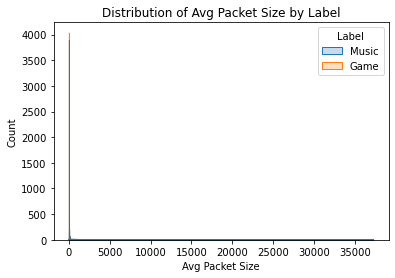

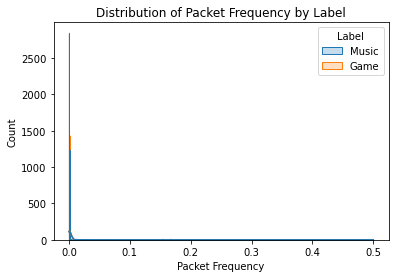

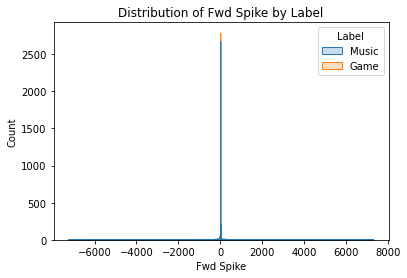

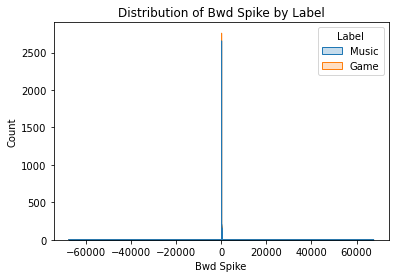

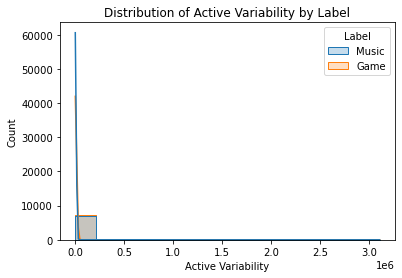

Cross-validation scores: [0.55637255 0.54621849 0.51995798 0.54500876 0.52259194]
Average cross-validation score: 0.5380299440266474

Balanced Test Set Classification Report:

              precision    recall  f1-score   support

        Game       0.53      0.50      0.51       889
       Music       0.48      0.51      0.49       803

    accuracy                           0.50      1692
   macro avg       0.50      0.50      0.50      1692
weighted avg       0.51      0.50      0.50      1692

Prediction (0=Music, 1=Gaming): ['Game']


/home/ylin250/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Combine training data
train_data = pd.concat([mtrain, gtrain])
X_train = train_data[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
y_train = train_data['Label']

# Combine testing data
mtest['Label'] = 'Music'
gtest['Label'] = 'Game'
test_data = pd.concat([mtest, gtest])
X_test = test_data[['Avg Packet Size', 'Packet Frequency', 'Fwd Spike', 'Bwd Spike', 'Active Variability']]
y_test = test_data['Label']

# Debug feature distributions
combined_data = pd.concat([X_train, y_train], axis=1)
for feature in X_train.columns:
    sns.histplot(data=combined_data, x=feature, hue=y_train, kde=True, element='step')
    plt.title(f"Distribution of {feature} by Label")
    plt.show()

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate with cross-validation
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Make predictions on the balanced test set
y_pred_balanced = clf.predict(X_test)
print("\nBalanced Test Set Classification Report:\n")
print(classification_report(y_test, y_pred_balanced, zero_division=0))

# Save the trained model
import joblib
joblib.dump(clf, 'random_forest_music_gaming.pkl')

# Example prediction
new_data = np.array([[200, 0.005, 10, -10, 0]])  # Replace with real values
prediction = clf.predict(new_data)
print("Prediction (0=Music, 1=Gaming):", prediction)


Feature Importances:
               Feature  Importance
1    Packet Frequency    0.479703
3           Bwd Spike    0.202370
2           Fwd Spike    0.181218
0     Avg Packet Size    0.132405
4  Active Variability    0.004304


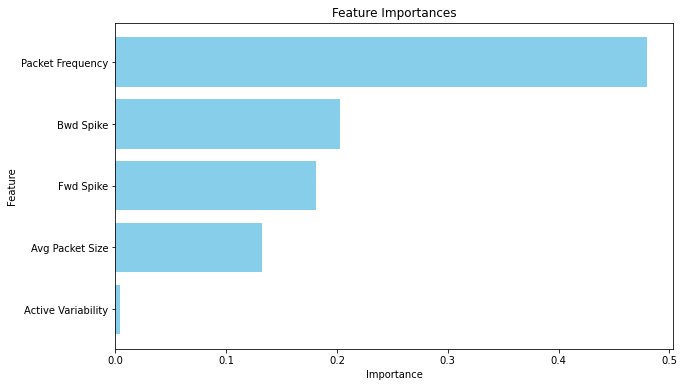

In [16]:
# fine tuning model
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
